# INFO 4330 (S50)              Group Project: Wine Quality 


Tony Shi 100333138

Shengjia Wang (Sandra) 100313389

Chang Shi (Ann) 100360367


# Overview 
In this project, we are planning to predicate the quality of wine by using what we have learned in the class such as linear regression. We also want to expand a little more form the class such as using clusters and k nearest neighbors. 
There is one dataset which is red wine. It requires building a few columns to analyze the quality of wine. Also, it helps staff to predicate the quality of wine.  


# Problem definition 
The dataset belongs to kaggle and it is classification modelling. There is one dataset which is red wine. It requires building a few columns to analyze the quality of wine. Also, it helps staff to predicate the quality of wine.  


In [93]:
import pandas as pd

import numpy as npy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
%matplotlib inline


# Reading the data

Regarding the data, it is numerical. We could use Python to do data analysis. 


In [94]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

In [95]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [96]:
print("Rows:", df.shape[0])
print("Colums:", df.shape[1])

Rows: 1599
Colums: 12


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [98]:
dff= df.describe()
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [99]:
dff.drop(["count"],axis=0,inplace=True)
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [100]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

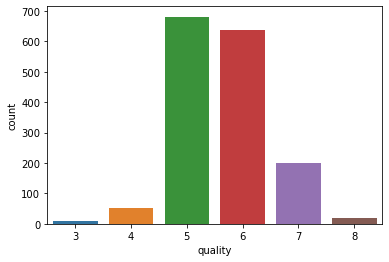

In [102]:
sns.countplot(x='quality',data= df) # range from 3- 8

In [103]:
check =[(df['quality']<5),(df['quality']==5),(df['quality']>5)]
per= ['no good','normal','good']
df['per']=npy.select(check,per,default="good")

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,per
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,normal


Explain: Labeling all the wine in terms of quality: quality less than 5, it labeled “not good”. Qualities equal to 5, it labeled “normal”. Qualities are greater than 5, it is labeled good.  

In [104]:
df.per.value_counts()

good       855
normal     681
no good     63
Name: per, dtype: int64

# First Visual analysis

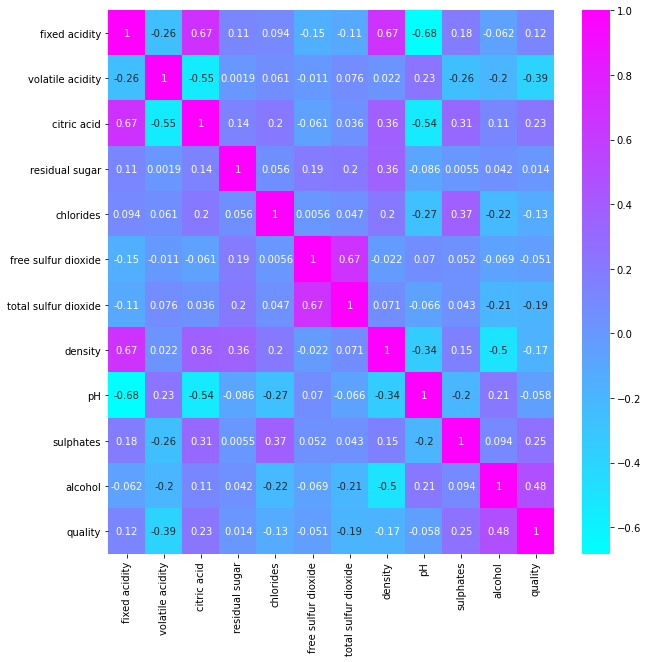

In [105]:

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='cool',annot=True)

Expalin: According to the graph, alcohol is 0.48.  The correlation of alcohol is ok. PH is -0.058 and has a bad correlation. Negaive numbers have bad correlation. 


# Supervised Learning

# Linear Regression

In [106]:
X=df.iloc[:,0:11] # all the columns
y=df.iloc[:,11]  # y= quality

In [107]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) # let 70 % of trainning, 30% of test. 


In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lm= LinearRegression()

In [112]:
lm.fit(X_train,y_train)

LinearRegression()

In [113]:
print(lm.intercept_)

9.096028695577077


In [114]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [115]:
coeff_df

,Coefficient
fixed acidity,0.019575
volatile acidity,-1.275143
citric acid,-0.232964
residual sugar,0.000862
chlorides,-1.848129
free sulfur dioxide,0.003043
total sulfur dioxide,-0.003315
density,-4.909952
pH,-0.304489
sulphates,0.821320


Explain: if increasing the fixed acidity 0.019, the quality of wine is good. 
         if decreasing the volatile acidity 1.27, the quality if wine is better. 

In [116]:
y_hat=lm.predict(X_test)

In [117]:
print('MAE',metrics.mean_absolute_error(y_test,y_hat))
print('MSE',metrics.mean_squared_error(y_test,y_hat))

MAE 0.526402466357678
MSE 0.43687438056067107


Explain: Regarding the result, having 0.43 errors. 

# Random Forest

In [118]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [119]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.74      0.78      0.76       210
           6       0.60      0.69      0.64       183
           7       0.64      0.50      0.56        58
           8       0.00      0.00      0.00        11

    accuracy                           0.66       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.63      0.66      0.65       480



C:\Users\Annsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Explain: Regarding the result, 68% is more accuracy. 

# Unsupervised Learning 

# K-Mean Cluster 

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [121]:
for k in range (2,10):
   kmeans=KMeans(init='k-means++',n_clusters=k)
   kmeans.fit(X)
   clusters=kmeans.predict(X)
   sil=silhouette_score(X,clusters)  
   print("sil:",sil,"K",k)

sil: 0.6034220347331241 K 2
sil: 0.5197446557038226 K 3
sil: 0.48545959739918065 K 4
sil: 0.44586322152946073 K 5
sil: 0.4485800365570335 K 6
sil: 0.395253659151526 K 7
sil: 0.381904569776806 K 8
sil: 0.386250278776779 K 9


Explain: Regarding the result, less cluster is more clear.  k=2 is better than k=9. K=9 is more mass. 

In [122]:
from sklearn.decomposition import PCA

In [123]:
kmeans=KMeans(init='k-means++',n_clusters=2)
kmeans.fit(X)
clusters=kmeans.predict(X)
sil=silhouette_score(X,clusters)
print("sil:", sil,"K:",2)

sil: 0.6034220347331241 K: 2


Explain: k=2 means is more clear. 

In [124]:
pca= PCA(n_components=2)
mat=pd.DataFrame(pca.fit_transform(X))
mat.head()

,0,1
0,-13.224905,-2.023900
1,22.037724,4.408322
2,7.162673,-2.501461
3,13.430063,-1.951122
4,-13.224905,-2.023900


Explain: Fousing on the X (Value), we spilt into two clusters. 

In [125]:
clusters
npy.unique(clusters)

array([0, 1])

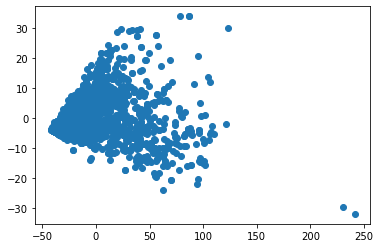

In [126]:
import matplotlib.pyplot as plt 
plt.scatter(mat[0],mat[1])

In [127]:
Color={0:'r',1:'b'}

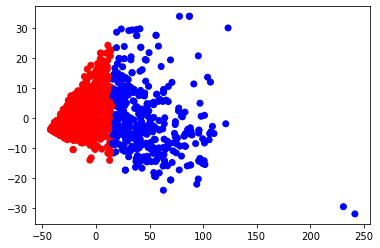

In [128]:
c_color=[Color[i] for i in clusters]
plt.scatter(mat[0],mat[1],c=c_color)

# K-Nearnest Neighbors

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
v=[]
krange=list(range(2,10))

In [131]:
for k in krange:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    kpred=knn.predict(X)
    v.append(metrics.accuracy_score(kpred,y))

In [132]:
v

[0.8105065666041276,
 0.7554721701063164,
 0.6985616010006254,
 0.6704190118824265,
 0.6522826766729206,
 0.6291432145090682,
 0.6228893058161351,
 0.5991244527829893]

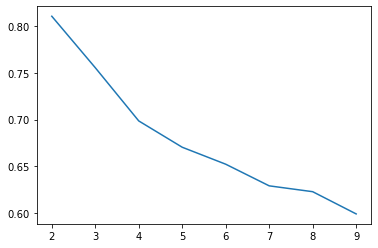

In [133]:
plt.plot(krange,v)

In [134]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
kpred=knn.predict(X)
print()

Explain: when k=2 the knn model has reach its highest accuracy which is 81%,after that it keep going down 

# Consluion
The cluster is not fit for this dataset because the acccury is only 60% and the data has tangling each other，the knn has 81% accury which is very high. The random forest we used has accury of 68%


# References of Data 
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
